In [2]:
import plumed
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/jonathan/anaconda3/envs/plumed1/lib/libplumedKernel.so" +++
/tmp/ipykernel_153500/3868043888.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  colvar=plumed.read_as_pandas(infile)
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/jonathan/anaconda3/envs/plumed1/lib/libplumedKernel.so" +++
/tmp/ipykernel_153500/3868043888.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  colvar=plumed.read_as_pandas(infile)
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/jonathan/anaconda3/envs/plumed1/lib/libplumedKernel.so" +++
/tmp/ipykernel_153500/3868043888.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instea

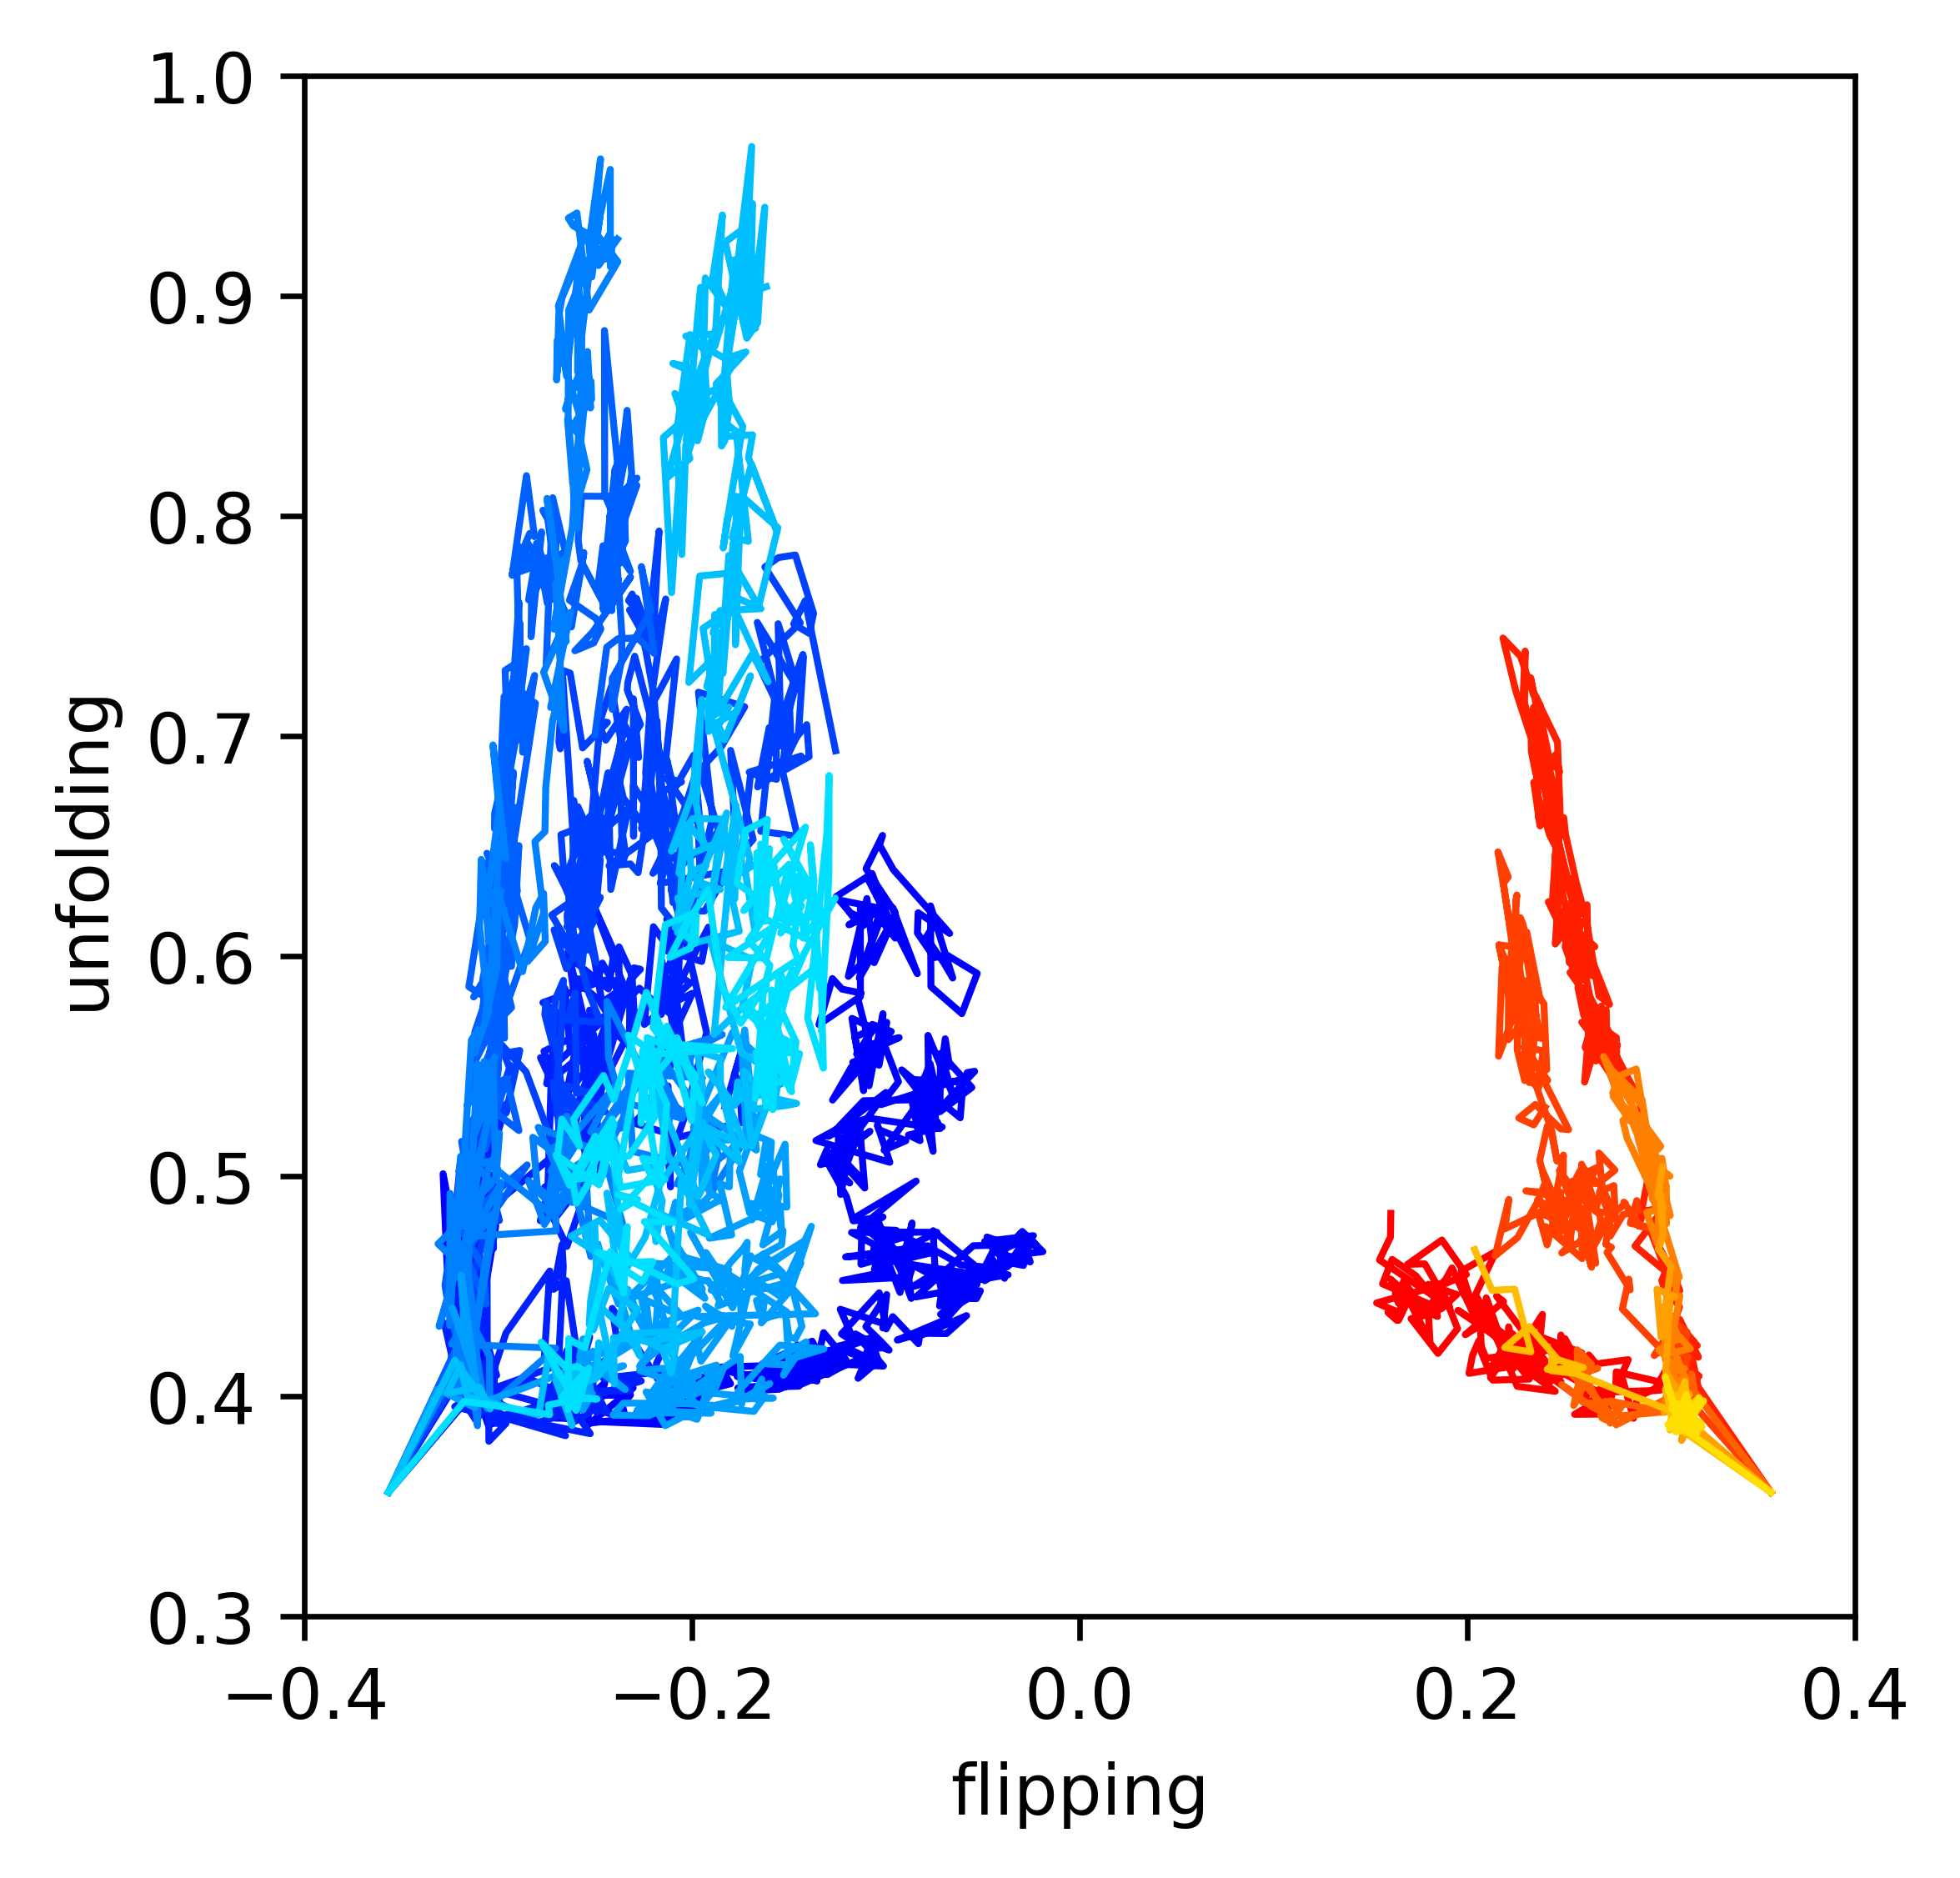

In [17]:
plt.figure(figsize=(4,4),dpi=600)

nwalkers = 8
for init_state in ["c","m"]:
    for walker in range(nwalkers):
        infile = f"/home/jonathan/Documents/grabelab/aac1-nt-transport/metadynamics/run2/run_{init_state}/COLVAR.{walker}"
        #infile = f"/home/jonathan/Documents/grabelab/aac1-ucp1/aac1/trajectories/plumed_tests/plumed/sys{system}/mwm{runnum}/{walker}/COLVAR"
        colvar=plumed.read_as_pandas(infile)

        freq = 1

        delta = list(colvar.pc_f1[::freq])
        sigma = list(colvar.pc_f2[::freq])

        pc_c = [(i+j)/2 for i,j in zip(delta,sigma)]
        pc_m = [-(i-j)/2 for i,j in zip(delta,sigma)]

        # color_lightness_const = 1
        # color_range_const = 1.5
        # color_1 = color_lightness_const*(1-walker/(color_range_const*nwalkers))
        # color_2 = color_lightness_const*walker/(color_range_const*nwalkers)
        #fade_rg = 0.8 - 0.8*walker/nwalkers
        if init_state == "c":
            plt.plot(delta, sigma, color = (0,walker/nwalkers,1), linewidth=1)
        elif init_state == "m":
            plt.plot(delta, sigma, color = (1,walker/nwalkers,0), linewidth=1)

        #plt.plot(delta, sigma)
        #plt.scatter(delta, sigma)

plt.xlabel("flipping")
plt.ylabel("unfolding")

plt.xlim(-0.4, 0.4)
plt.ylim(0.3, 1)
plt.show()

In [ ]:
#-------------------------------------------------------------------------------------------------------------
#see https://www.plumed-tutorials.org/lessons/21/004/data/notebooks/solution.html

#generate fes.dat from HILLS on a dev node with with: plumed sum_hills --hills HILLS --mintozero 

In [4]:
#####################################################################################################
#                                       CONSTANTS
#####################################################################################################

#unit conversion for correct axis label (and some amusing copilot suggestions)
e_charge = 1.602176634e-19 # C #copilot knew the value once I typed in the variable name and it matches https://physics.nist.gov/cgi-bin/cuu/Value?e

#Below I typed in the variable name and copilot suggested the rest of the following line, which is only slightly wrong, having seemingly learned from my comment on the previous line:
#epsilon0 = 8.854187817e-12 # F/m #copilot suggested this and it matches https://physics.nist.gov/cgi-bin/cuu/Value?epsilon0
#Below is copilot trying to impersonate me and talking about itself in the 3rd person. As I wrote the previous sentence, copilot suggested that I end it with: ", which is a bit creepy but also kind of funny"
#epsilon0 = 8.8541878188e-12 # F/m # I found this value in the documentation for scipy.constants, which is a more recent value than the one suggested by copilot

epsilon0 = 8.8541878188e-12 # F/m = C^2/J # from https://physics.nist.gov/cgi-bin/cuu/Value?ep0

#copilot suggested the correct value, units, constant name, and source here
kB = 1.380649e-23 # J/K # Boltzmann constant, from https://physics.nist.gov/cgi-bin/cuu/Value?k
#copilot got this one except for the link having NA capitalized
NA = 6.02214076e23 # Avogadro's number, from https://physics.nist.gov/cgi-bin/cuu/Value?na

T = 310.15 #simulation temperature

D=80 #dielectric constant of water

#conversion factor (from sum of inverse distances in nm to energies in kT)
conversion_factor = e_charge**2 / (D * 4 * np.pi * epsilon0 * kB * T * 1e-9) # in kJ/mol, equation suggested by copilot and matches my derivation except for the nm to m conversion term which it missed
conversion_factor_kJmol = NA*e_charge**2 / (D * 4 * np.pi * epsilon0 * kB * T * 1e-9*1000) # in kJ/mol, equation suggested by copilot and matches my derivation except for the nm to m conversion term which it missed
#note that this is the absolute electrostatic binding energy in vacuum, not the energy relative to aqueous solution

#beware that this is a bit misleading, since the contour levels are in kJ/mol but the x-axis label is in kT.
#The above comment was written by copilot after I said 'beware', and it was a useful point that I hadn't thought of


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/jonathan/anaconda3/envs/plumed1/lib/libplumedKernel.so" +++
/tmp/ipykernel_145192/3406708220.py:44: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=plumed.read_as_pandas(fesfile)


Text(0, 0.5, '(dRMSDc-dRMSDm)/(dRMSDc+dRMSDm)')

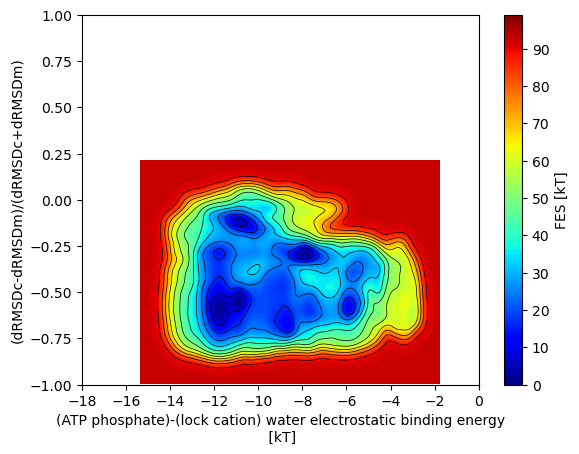

In [ ]:
# system = 3
# runnum = 1
# date = "041625"
fesfile = "/home/jonathan/Documents/grabelab/aac1-nt-transport/metadynamics/run1/run_c/summed_hills/fes-010626.dat"
#fesfile = f"/home/jonathan/Documents/grabelab/aac1-ucp1/aac1/trajectories/plumed_tests/plumed/sys{system}/mwm{runnum}/fes-{date}.dat"
#fesfile = f"/home/jonathan/Documents/grabelab/aac1-ucp1/aac1/trajectories/plumed_tests/plumed/sys4/mwm{runnum}/fes-{date}.dat"
#fesfile = f"/home/jonathan/Documents/grabelab/aac1-ucp1/aac1/trajectories/plumed_tests/plumed/run1/run/fes-033125.dat"


# plot final fes
data=plumed.read_as_pandas(fesfile)

nbins_pc_p = int(data.__dict__['plumed_constants'][2][2])
nbins_pc_f = int(data.__dict__['plumed_constants'][6][2])

# get data for countour plot
pc_p = np.array(data["pc_p"]).reshape(nbins_pc_f,nbins_pc_p)*conversion_factor
pc_f = np.array(data["pc_f"]).reshape(nbins_pc_f,nbins_pc_p)
fes = np.array(data["file.free"]).reshape(nbins_pc_f,nbins_pc_p)*1000/(NA*kB*T)

#plot
from matplotlib import ticker, cm

max_contour = 100

plt.contour(pc_p, pc_f, fes, levels=range(0,max_contour,8), linewidths=0.5, colors='k')
cntr = plt.contourf(pc_p, pc_f, fes, levels=range(0,max_contour), cmap=cm.jet)
plt.colorbar(cntr, label="FES [kT]")

#plt.colorbar(cntr, label="FES [kJ/mol]")

plt.xlim(-18,0) #-25,0
plt.ylim(-1,1)
plt.xlabel(f"(ATP phosphate)-(lock cation) water electrostatic binding energy\n [kT]")
plt.ylabel("(dRMSDc-dRMSDm)/(dRMSDc+dRMSDm)")

#plt.savefig(f"run1-run-fes-{date}.png", dpi=600)

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/jonathan/anaconda3/envs/plumed1/lib/libplumedKernel.so" +++
/tmp/ipykernel_145192/2294895365.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=plumed.read_as_pandas(fesfile)


Text(0, 0.5, '(dRMSDc-dRMSDm)/(dRMSDc+dRMSDm)')

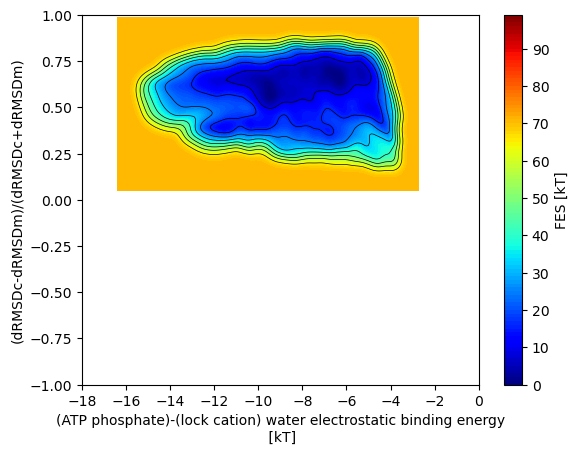

In [6]:
fesfile = "/home/jonathan/Documents/grabelab/aac1-nt-transport/metadynamics/run1/run_m/summed_hills/fes-010626.dat"
#fesfile = f"/home/jonathan/Documents/grabelab/aac1-ucp1/aac1/trajectories/plumed_tests/plumed/sys{system}/mwm{runnum}/fes-{date}.dat"
#fesfile = f"/home/jonathan/Documents/grabelab/aac1-ucp1/aac1/trajectories/plumed_tests/plumed/sys4/mwm{runnum}/fes-{date}.dat"
#fesfile = f"/home/jonathan/Documents/grabelab/aac1-ucp1/aac1/trajectories/plumed_tests/plumed/run1/run/fes-033125.dat"


# plot final fes
data=plumed.read_as_pandas(fesfile)

nbins_pc_p = int(data.__dict__['plumed_constants'][2][2])
nbins_pc_f = int(data.__dict__['plumed_constants'][6][2])

# get data for countour plot
pc_p = np.array(data["pc_p"]).reshape(nbins_pc_f,nbins_pc_p)*conversion_factor
pc_f = np.array(data["pc_f"]).reshape(nbins_pc_f,nbins_pc_p)
fes = np.array(data["file.free"]).reshape(nbins_pc_f,nbins_pc_p)*1000/(NA*kB*T)

#plot
from matplotlib import ticker, cm

max_contour = 100

plt.contour(pc_p, pc_f, fes, levels=range(0,max_contour,8), linewidths=0.5, colors='k')
cntr = plt.contourf(pc_p, pc_f, fes, levels=range(0,max_contour), cmap=cm.jet)
plt.colorbar(cntr, label="FES [kT]")

#plt.colorbar(cntr, label="FES [kJ/mol]")

plt.xlim(-18,0) #-25,0
plt.ylim(-1,1)
plt.xlabel(f"(ATP phosphate)-(lock cation) water electrostatic binding energy\n [kT]")
plt.ylabel("(dRMSDc-dRMSDm)/(dRMSDc+dRMSDm)")

#plt.savefig(f"run1-run-fes-{date}.png", dpi=600)